In [1]:
import sys; sys.path.insert(0,'../../yapmap')
import sys; sys.path.insert(0,'..')
from lltk import *
from lltk.model.networks import draw_nx
gdb=GDB()

In [2]:
res=Corpus('markmark').sync(), Corpus('chicago').sync()

In [3]:
addrs=['_markmark/James,_Henry.The_Ambassadors', '_markmark/James,_Henry.The_Golden_Bowl', '_markmark/James,_Henry.The_Portrait_of_a_Lady', '_markmark/James,_Henry.The_Wings_of_the_Dove', '_markmark/James,_Henry.The_Bostonians', '_chicago/00000086', '_chicago/00000524', '_chicago/00000711', '_chicago/00000901', '_chicago/00000902', '_chicago/00001457', '_chicago/00001601', '_chicago/00001757', '_chicago/00002238', '_chicago/00002499', '_chicago/00003859', '_chicago/00000038', '_chicago/00003858', '_chicago/00004205', '_chicago/00000039', '_chicago/00000381', '_chicago/00000037', '_chicago/00000130', '_chicago/00001312', '_chicago/00002099', '_chicago/00003255']
texts=list(map(Text,addrs))
t=texts[0]
# t, t._meta

In [4]:
# with log.silent:
#     for tx in get_tqdm(texts): tx.init(remote=True)

In [5]:
# with log: t.init(remote=True)
t, len(t.sources), t.sources, [(tx.shorttitle, len(tx._meta)) for tx in t.sources]

(TextMarkMark(_markmark/James,_Henry.The_Ambassadors),
 10,
 [TextGoodreads(_goodreads/13816050-the-ambassadors),
  TextHathiRecord(_hathi/htrn/000145209),
  TextHathiRecord(_hathi/htrn/000481327),
  TextHathiRecord(_hathi/htrn/000481328),
  TextHathiRecord(_hathi/htrn/001947310),
  TextHathiRecord(_hathi/htrn/003302371),
  TextISBN(_isbn/089966606X),
  TextISBN(_isbn/140034994),
  TextISBN(_isbn/9780899666068),
  TextWikidataClass(_wikidata/Q650571)],
 [('The Ambassadors', 25),
  ('The Ambassadors', 17),
  ('The Ambassadors', 15),
  ('The Ambassadors', 14),
  ('The Ambassadors', 15),
  ('The Ambassadors', 15),
  ('The Ambassadors', 30),
  ('', 5),
  ('The Ambassadors', 30),
  ('The Ambassadors', 21)])

In [6]:
for tx in texts:
    print(tx.shorttitle, len(tx.sources), len(tx.dsources))

The Ambassadors 10 10
The Golden Bowl 7 6
The Portrait Of A Lady 12 10
The Wings Of The Dove 7 6
The Bostonians 11 9
The Portrait Of A Lady 12 10
The Aspern Papers 9 8
The Tragic Muse 7 6
Daisy Miller 14 8
The Lesson Of The Master 10 9
What Maisie Knew 8 8
In The Cage 6 6
The Awkward Age 7 7
The Wings Of The Dove 7 6
The Golden Bowl 7 6
The Altar Of The Dead 14 6
A Bundle Of Letters 9 6
The Coxon Fund 14 5
The Jolly Corner 14 3
The Diary Of A Man Of Fifty 9 3
The Bostonians 11 9
Confidence 7 6
Roderick Hudson 7 6
Embarrassments 4 4
The Sacred Fount 7 7
The Finer Grain 31 5


In [7]:
pladys = [t for t in texts if 'portrait of a lady' in t.title.lower()]
t = pladys[0]
pladys

[TextMarkMark(_markmark/James,_Henry.The_Portrait_of_a_Lady),
 TextChicago(_chicago/00000086)]

In [13]:


def to_nx(self,texts,rel=None,bad_corpora={},progress=True,**kwargs):
    g=nx.MultiGraph()
    for tx in get_tqdm(texts) if progress else texts:
        for src in Text(tx).sources:
            if src.corpus.id in bad_corpora: continue
            for u,v,d in src.gdb.get_edges(src.addr):
                relx=d.get('rel')
                if rel and relx != rel: continue
                if not g.has_node(u): g.add_node(u)#,**Text(u).meta)
                if not g.has_node(v): g.add_node(v)#,**Text(v).meta)
                if not g.has_edge(u,v,key=relx):
                    g.add_edge(u,v,key=relx,**d)
    return g

LLDBGraph.to_nx=to_nx

In [14]:
C=Corpus('markmark')

In [16]:
%%timeit
g=gdb.to_nx(texts,progress=False)
g

39.9 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
# draw_nx(g)

In [20]:
# for nodeset in nx.connected_components(g):
#     tset={Text(x) for x in nodeset if Text(x) in set(texts)}
#     print([(t.addr, t.shorttitle) for t in tset])

In [ ]:
def to_nx2(self,texts,rel=None,min_overlap=2,bad_corpora={},**kwargs):
    g=nx.Graph()
    for t1 in get_tqdm(texts):
        n1=f'{t1.shorttitle} [{t1.addr}]'
        if not g.has_node(n1): g.add_node(n1)
        t1dsrcs = set(t1.dsources)
        for t2 in t1.sources:
            n2=f'{t2.shorttitle} [{t2.addr}]'
            if g.has_edge(n1,n2): continue
            t2dsrcs = set(t2.dsources)
            overlap = t1dsrcs & t2dsrcs
            log(f'overlap between {t1.addr} and {t2.addr} = {overlap}')
            if len(overlap)>=min_overlap:
                g.add_edge(n1,n2)

    return g

LLDBGraph.to_nx2=to_nx2


In [ ]:
def get_matches(self,id):

In [23]:
with log:
    g=gdb.to_nx2(texts)

  0%|          | 0/26 [00:00<?, ?it/s]

[10:39:44] __main__.to_nx2( overlap between _markmark/James,_Henry.The_Ambassadors and _goodreads/13816050-the-ambassadors = set() )
[10:39:44] __main__.to_nx2( overlap between _markmark/James,_Henry.The_Ambassadors and _hathi/htrn/000145209 = set() )
[10:39:44] __main__.to_nx2( overlap between _markmark/James,_Henry.The_Ambassadors and _hathi/htrn/000481327 = set() )
[10:39:44] __main__.to_nx2( overlap between _markmark/James,_Henry.The_Ambassadors and _hathi/htrn/000481328 = set() )
[10:39:44] __main__.to_nx2( overlap between _markmark/James,_Henry.The_Ambassadors and _hathi/htrn/001947310 = set() )
[10:39:44] __main__.to_nx2( overlap between _markmark/James,_Henry.The_Ambassadors and _hathi/htrn/003302371 = set() )
[10:39:44] __main__.to_nx2( overlap between _markmark/James,_Henry.The_Ambassadors and _isbn/089966606X = set() )
[10:39:44] __main__.to_nx2( overlap between _markmark/James,_Henry.The_Ambassadors and _isbn/140034994 = set() )
[10:39:44] __main__.to_nx2( overlap between _

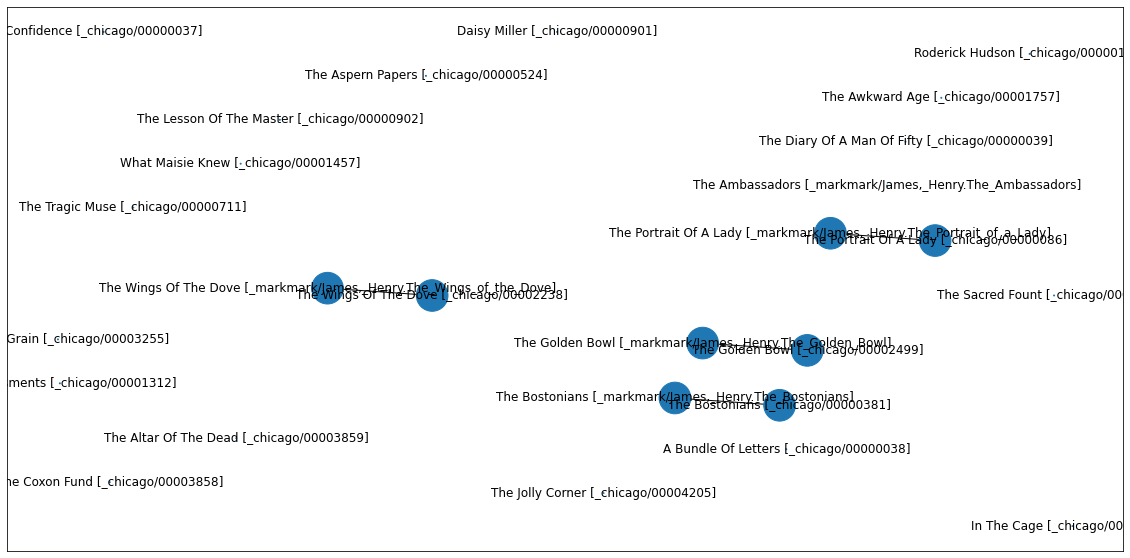

In [24]:
draw_nx(g)